In [2]:
#  Import dependencies
import pandas as pd
import re


In [3]:
#Read in data
wine_df = pd.read_csv("clean_wine_data_final.csv")
wine_df.head()

,country,description,points,price,province,region,title,variety,winery,rating_category,type
0,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Good,White
1,US,"Pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Good,White
2,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Good,Red
3,France,This has great depth of flavor with its fresh ...,87,27,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Good,White
4,US,"Soft, supple plum envelopes an oaky structure ...",87,19,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Good,Red


In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76736 entries, 0 to 76735
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          76736 non-null  object
 1   description      76736 non-null  object
 2   points           76736 non-null  int64 
 3   price            76736 non-null  int64 
 4   province         76736 non-null  object
 5   region           76736 non-null  object
 6   title            76736 non-null  object
 7   variety          76736 non-null  object
 8   winery           76736 non-null  object
 9   rating_category  76736 non-null  object
 10  type             73897 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.4+ MB


## Add Rose to Type

In [5]:
wine_df['type'].value_counts()

type
Red            39062
White          17124
Red Blend      14036
White Blend     1838
Sparkling       1837
Name: count, dtype: int64

In [7]:
null_type = wine_df.loc[wine_df['type'].isnull()]
null_type['variety'].value_counts()

variety
Rosé    2839
Name: count, dtype: int64

In [12]:
# Create a mapping of wine varieties into types
wine_type_mapping = {
    'Pinot Noir': 'Red',
    'Cabernet Sauvignon': 'Red',
    'Syrah': 'Red',
    'Zinfandel': 'Red',
    'Merlot': 'Red',
    'Malbec': 'Red',
    'Sangiovese': 'Red',
    'Nebbiolo': 'Red',
    'Tempranillo': 'Red',
    'Cabernet Franc': 'Red',
    
    'Chardonnay': 'White',
    'Sauvignon Blanc': 'White',
    'Riesling': 'White',
    'Pinot Gris': 'White',
    
    'Red Blend': 'Red Blend',
    'Bordeaux-style Red Blend': 'Red Blend',
    'Rhône-style Red Blend': 'Red Blend',

    'White Blend': 'White Blend',

    'Sparkling Blend': 'Sparkling',

    'Rosé': 'Rosé'
}
# Create a new 'type' column by mapping 'variety' to 'wine_type_mapping'
wine_df['type'] = wine_df['variety'].map(wine_type_mapping)

# Display the DataFrame with the new 'type' column
wine_df.head()

,country,description,points,price,province,region,title,variety,winery,rating_category,type
0,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Good,White
1,US,"Pineapple rind, lemon pith and orange blossom ...",87,13,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Good,White
2,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Good,Red
3,France,This has great depth of flavor with its fresh ...,87,27,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Good,White
4,US,"Soft, supple plum envelopes an oaky structure ...",87,19,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,Good,Red


In [15]:
wine_df['type'].value_counts()

type
Red            39062
White          17124
Red Blend      14036
Rosé            2839
White Blend     1838
Sparkling       1837
Name: count, dtype: int64

## Create 'Vintage' Column Using Regex

In [54]:
#Create copy of winery column for Regex string
wine_df['winery_copy'] = wine_df['winery']

In [17]:
# Escape any special characters in winery string
wine_df['winery_copy'] = wine_df['winery_copy'].apply(lambda x : re.escape(x))

In [23]:
# Fine sampel wineries with special character '(' and check escaping 
p = '\('
wine_df[['winery', 'winery_copy']][wine_df['winery'].str.contains(p)]

,winery,winery_copy
3769,Domaines Barons de Rothschild (Lafite),Domaines\ Barons\ de\ Rothschild\ \(Lafite\)
5347,Domaines Barons de Rothschild (Lafite),Domaines\ Barons\ de\ Rothschild\ \(Lafite\)
7395,Domaines Barons de Rothschild (Lafite),Domaines\ Barons\ de\ Rothschild\ \(Lafite\)
12503,E. Pira e Figli (Chiara Boschis),E\.\ Pira\ e\ Figli\ \(Chiara\ Boschis\)
33953,E. Pira e Figli (Chiara Boschis),E\.\ Pira\ e\ Figli\ \(Chiara\ Boschis\)
34420,Domaines Barons de Rothschild (Lafite),Domaines\ Barons\ de\ Rothschild\ \(Lafite\)
37409,Domaines Barons de Rothschild (Lafite),Domaines\ Barons\ de\ Rothschild\ \(Lafite\)
49830,Ma(i)sonry,Ma\(i\)sonry
53581,Domaines Barons de Rothschild (Lafite),Domaines\ Barons\ de\ Rothschild\ \(Lafite\)
60758,Ma(i)sonry,Ma\(i\)sonry


In [37]:
# Define function that will extract the vintage/year usig regex

## Don't need >1 becasue only Multiple has 2 years and first one is the accurate one 

def extract_vintage(title,winery):
    vintage = re.findall('(?:'+ winery +'\D*)([\d+]{4})',title)
    if len(vintage) == 0: 
        return 'No Year'
    #if len(vintage) > 1: 
    #    return 'Multiple'
    else: 
        return vintage[0]

In [38]:
# Apply extract_vintage function to create vintage column, passing title and escaped winery text
wine_df['vintage'] = wine_df.apply(lambda x: extract_vintage(x['title'], x['winery_copy']), axis=1)

In [51]:
# Value_counts for vintage
#pd.set_option("display.max_rows", None)
counts = wine_df['vintage'].value_counts()
counts.head(15)

vintage
2012       10132
2013       9871 
2014       9715 
2010       7488 
2011       7379 
2009       6074 
2015       5050 
2008       4281 
2007       3962 
2006       3301 
2005       2337 
No Year    1902 
2016       1747 
2004       1049 
2000       477  
Name: count, dtype: int64

In [32]:
# Ensuring no null values 
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76736 entries, 0 to 76735
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          76736 non-null  object
 1   description      76736 non-null  object
 2   points           76736 non-null  int64 
 3   price            76736 non-null  int64 
 4   province         76736 non-null  object
 5   region           76736 non-null  object
 6   title            76736 non-null  object
 7   variety          76736 non-null  object
 8   winery           76736 non-null  object
 9   rating_category  76736 non-null  object
 10  type             76736 non-null  object
 11  winery_copy      76736 non-null  object
 12  vintage          76736 non-null  object
dtypes: int64(2), object(11)
memory usage: 7.6+ MB


In [36]:
#Reviewing Multiple tags
wine_df.loc[wine_df['vintage']== 'Multiple']


,country,description,points,price,province,region,title,variety,winery,rating_category,type,winery_copy,vintage
65558,Spain,"Bulky and clumsy, with powerful early barnyard...",84,8,Northern Spain,Vino de la Tierra de Castilla y León,Riscal 2000 Riscal 1860 Tempranillo (Vino de l...,Tempranillo,Riscal,Good,Red,Riscal,Multiple
73818,Spain,"Savory and deep given the price, with dark col...",86,9,Northern Spain,Vino de la Tierra de Castilla y León,Riscal 2006 Riscal 1860 Tempranillo (Vino de l...,Tempranillo,Riscal,Good,Red,Riscal,Multiple


In [41]:
# Checking 2 wineries with more than 1 year from Regex (65558, 73818)
wine_df.iloc[73818,:]

country                                                        Spain
description        Savory and deep given the price, with dark col...
points                                                            86
price                                                              9
province                                              Northern Spain
region                          Vino de la Tierra de Castilla y León
title              Riscal 2006 Riscal 1860 Tempranillo (Vino de l...
variety                                                  Tempranillo
winery                                                        Riscal
rating_category                                                 Good
type                                                             Red
winery_copy                                                   Riscal
vintage                                                         2006
Name: 73818, dtype: object

In [48]:
#Review No Year for accuracy
pd.set_option('display.max_colwidth', 0)
no_year = wine_df.loc[wine_df['vintage']== 'No Year']
no_year['title'].tail(40)

75395    Muga NV Conde de Haro Brut Sparkling (Cava)                                     
75466    Pierre Moncuit NV Hugues de Coulmet Blanc de Blancs Brut Chardonnay (Champagne) 
75486    Karma NV Side View Chardonnay (North Coast)                                     
75581    Canals Canals NV Rosat Reserva Sparkling (Cava)                                 
75602    àMaurice NV Pour Me Red (Columbia Valley (WA))                                  
75632    McFadden NV Cuvée Brut Sparkling (Potter Valley)                                
75647    Diví Elegància NV Ambré White (Rivesaltes)                                      
75648    Diví Elegància NV Tuilé Red (Rivesaltes)                                        
75756    BookCliff NV Lucky Twenty White (Colorado)                                      
75802    Vilarnau NV Brut Rosé Sparkling (Cava)                                          
75804    Va Piano Bruno's Blend VII NV Red Red (Columbia Valley (WA))                    
75807    H

In [47]:
pd.reset_option('display.max_colwidth')

In [49]:
no_year['type'].value_counts()

type
Sparkling      1071
White          278 
Red Blend      225 
Red            202 
White Blend    91  
Rosé           35  
Name: count, dtype: int64

In [55]:
wine_df = wine_df.drop(columns = 'winery_copy')
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76736 entries, 0 to 76735
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          76736 non-null  object
 1   description      76736 non-null  object
 2   points           76736 non-null  int64 
 3   price            76736 non-null  int64 
 4   province         76736 non-null  object
 5   region           76736 non-null  object
 6   title            76736 non-null  object
 7   variety          76736 non-null  object
 8   winery           76736 non-null  object
 9   rating_category  76736 non-null  object
 10  type             76736 non-null  object
 11  vintage          76736 non-null  object
dtypes: int64(2), object(10)
memory usage: 7.0+ MB


### Testing viability of creating a boolean column by key words 

In [66]:
#Testing viability of tagging by key words 
p = 'fruity'
fruity_df = wine_df[wine_df['description'].str.contains(p)]
fruity_df.head()

,country,description,points,price,province,region,title,variety,winery,rating_category,type,vintage,fruity
32,France,"From the warm 2015 vintage, this is a soft and fruity wine. It's open with broad white fruit flavors, the acidity lighter than usual for Chablis, giving it a particularly ripe character. Drink now.",86,24,Burgundy,Chablis,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,Good,White,2015,True
41,US,"Some rosés are made simply by bleeding the juice from the fermenter, to concentrate the remaining wine. Whether or not that is the case here, the wine has the simple pleasant lightly candied strawberry flavors one might expect from such a technique. It's fruity and undemanding. Drink up.",86,25,Oregon,Eola-Amity Hills,Z'IVO 2015 Rosé of Pinot Noir (Eola-Amity Hills),Pinot Noir,Z'IVO,Good,Red,2015,True
49,US,"This blends 20% each of all five red-Bordeaux varieties, showing grapy, plummy flavor that's juicy and soft on the palate. With a core of tobacco, tar and graphite, it complements the fruity with the savory, ending simply and elegantly.",88,75,California,Napa Valley,Soquel Vineyards 2013 Intreccio Library Selection Red (Napa Valley),Bordeaux-style Red Blend,Soquel Vineyards,Very Good,Red Blend,2013,True
54,Italy,"Made predominantly with Trebbiano and Malvasia, along with Pinot Bianco, Pinot Grigio and Riesling Renano, this has inviting aromas of ripe orchard fruit and citrus. The round fruity palate doles out ripe apricot, orange zest and juicy pineapple.",87,14,Tuscany,Toscana,Marchesi Antinori 2015 Villa Antinori White (Toscana),White Blend,Marchesi Antinori,Good,White Blend,2015,True
109,US,"This is a soft, well-crafted wine from the eastern side of St. Helena that's both classic in its dried herb, tobacco and tea aromas and fruity with red currant and cranberry notes.",90,60,California,Napa Valley,Sequum 2013 Four Soil Mélange Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Sequum,Very Good,Red,2013,True


In [63]:
# Assigning column fruity based on if key word is in the description 
p = 'fruity'
wine_df['fruity'] = wine_df['description'].str.contains(p)
wine_df['fruity'].value_counts()

fruity
False    72175
True     4561 
Name: count, dtype: int64

In [65]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76736 entries, 0 to 76735
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          76736 non-null  object
 1   description      76736 non-null  object
 2   points           76736 non-null  int64 
 3   price            76736 non-null  int64 
 4   province         76736 non-null  object
 5   region           76736 non-null  object
 6   title            76736 non-null  object
 7   variety          76736 non-null  object
 8   winery           76736 non-null  object
 9   rating_category  76736 non-null  object
 10  type             76736 non-null  object
 11  vintage          76736 non-null  object
 12  fruity           76736 non-null  bool  
dtypes: bool(1), int64(2), object(10)
memory usage: 7.1+ MB


## WordCloud

In [67]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [68]:
all_words = " ".join(t for t in wine_df.description)

In [77]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['wine', 'flavor', 'flavors','notes', 'palate', 'finish', 'years', 'offers', 'texture', 
                  'hint', 'hints', 'drink',
                  'now','show'])


In [71]:
?WordCloud

Init signature:
WordCloud(
    font_path=None,
    width=400,
    height=200,
    margin=2,
    ranks_only=None,
    prefer_horizontal=0.9,
    mask=None,
    scale=1,
    color_func=None,
    max_words=200,
    min_font_size=4,
    stopwords=None,
    random_state=None,
    background_color='black',
    max_font_size=None,
    font_step=1,
    mode='RGB',
    relative_scaling='auto',
    regexp=None,
    collocations=True,
    colormap=None,
    normalize_plurals=True,
    contour_width=0,
    contour_color='black',
    repeat=False,
    include_numbers=False,
    min_word_length=0,
    collocation_threshold=30,
)
Docstring:     
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=2

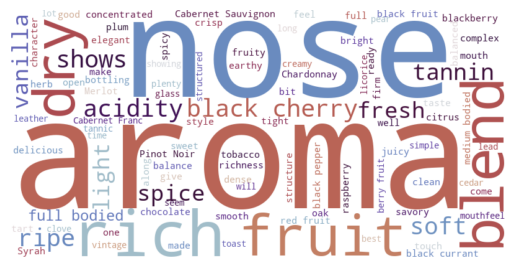

In [82]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      width = 800,
                      height = 400,
                      max_words = 100, 
                      colormap= 'twilight_shifted').generate(all_words)


# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Visualizations

In [83]:
import plotly.express as px

In [85]:
wine_df['country'].value_counts()

country
US           46716
France       12879
Italy        9261 
Spain        3374 
Argentina    3080 
Australia    1227 
Canada       199  
Name: count, dtype: int64

In [90]:
# Scatter of Canadian Wine by price and points 
fig = px.scatter(wine_df.query("country=='Canada'"), x="price", y="points",
	         size="price", color="type",
                 hover_name="title")
fig.show()

In [120]:
by_country = wine_df.groupby('country')[['price','points']].agg('mean').round(2)
by_country = by_country.reset_index()
by_country

,country,price,points
0,Argentina,25.48,86.85
1,Australia,29.44,88.04
2,Canada,34.67,89.35
3,France,42.33,88.70
4,Italy,48.03,89.15
5,Spain,28.24,87.24
6,US,37.94,88.66


In [105]:
fig2 = px.scatter(by_country, x="price", y="points",
	         size="price", hover_name = 'country', color = 'country')

fig2.show()

In [124]:
#wine_count_country = wine_df.groupby('country')[['price']].count()
wine_count_country = wine_df.groupby('country').agg(Count = ('country', 'count'))
wine_count_country = wine_count_country.reset_index().rename(columns = {'country':'Country'})
wine_count_country

,Country,Count
0,Argentina,3080
1,Australia,1227
2,Canada,199
3,France,12879
4,Italy,9261
5,Spain,3374
6,US,46716


In [149]:
colors = ['#7A2987', '#B9357D', '#E0457B', '#F77882', '#FAA094', '#FCC5B8', '#FEE5D9']


fig = px.pie(wine_count_country, values='Count', names='Country', title='Number of Wines By Country', hole = .45,
             width = 500, height = 500, color_discrete_sequence = colors)
fig.show()

In [154]:
by_country_type = wine_df.groupby(['country','type'])[['price','points']].agg('mean').round(2).reset_index()
by_country_type


,country,type,price,points
0,Argentina,Red,25.77,87.01
1,Argentina,Red Blend,36.01,88.79
2,Argentina,Rosé,13.43,84.08
3,Argentina,Sparkling,17.81,84.69
4,Argentina,White,16.88,84.85
5,Argentina,White Blend,20.74,84.74
6,Australia,Red,36.42,88.58
7,Australia,Red Blend,39.15,88.22
8,Australia,Rosé,18.54,87.35
9,Australia,Sparkling,20.88,87.06
